## MACHINE LEARNING

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#  1 - Loading and Preprocessing

data = pd.read_csv('CarPrice_Assignment.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
data = data.dropna()

In [7]:
data = pd.get_dummies(data, drop_first=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 191 entries, car_ID to fuelsystem_spfi
dtypes: bool(175), float64(8), int64(8)
memory usage: 60.8 KB


In [8]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Split the data into train and test sets
scaler = StandardScaler()
x = data.drop('price', axis=1)  # Assuming 'price' is the target column
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

----------------------------------------

In [11]:
# 2 - Model Implementation

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}


In [12]:
results = []
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R-Squared": r2,
        "MSE": mse,
        "MAE": mae
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                         Model  R-Squared           MSE          MAE
0            Linear Regression  -1.239056  1.767601e+08  7280.667793
1      Decision Tree Regressor   0.866580  1.053268e+07  2098.308951
2      Random Forest Regressor   0.953732  3.652598e+06  1380.926171
3  Gradient Boosting Regressor   0.931561  5.402849e+06  1685.616428
4     Support Vector Regressor  -0.101989  8.699543e+07  5707.167500


-------------------------------

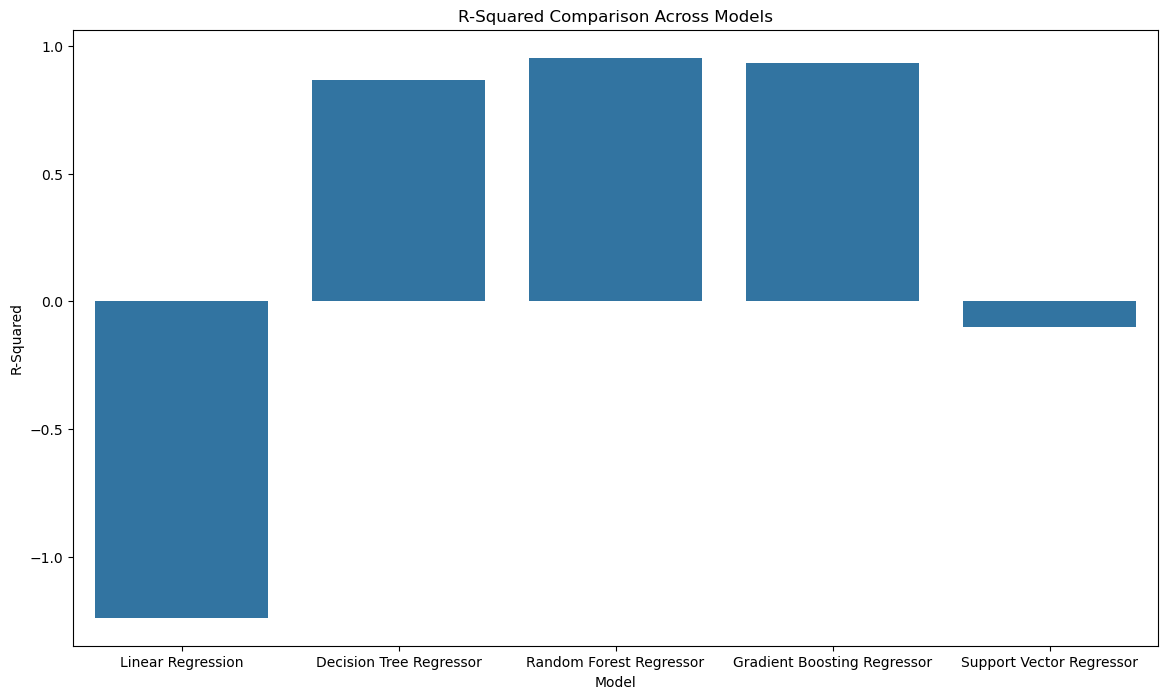

Best Model: Random Forest Regressor


In [14]:
# 3 - Model Evaluation

# Visualize 

plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="R-Squared", data=results_df)
plt.title("R-Squared Comparison Across Models", )
plt.show()

# Identify the best model
best_model_name = results_df.loc[results_df['R-Squared'].idxmax(), 'Model']
print(f"Best Model: {best_model_name}")

------------------------------------------

In [16]:
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

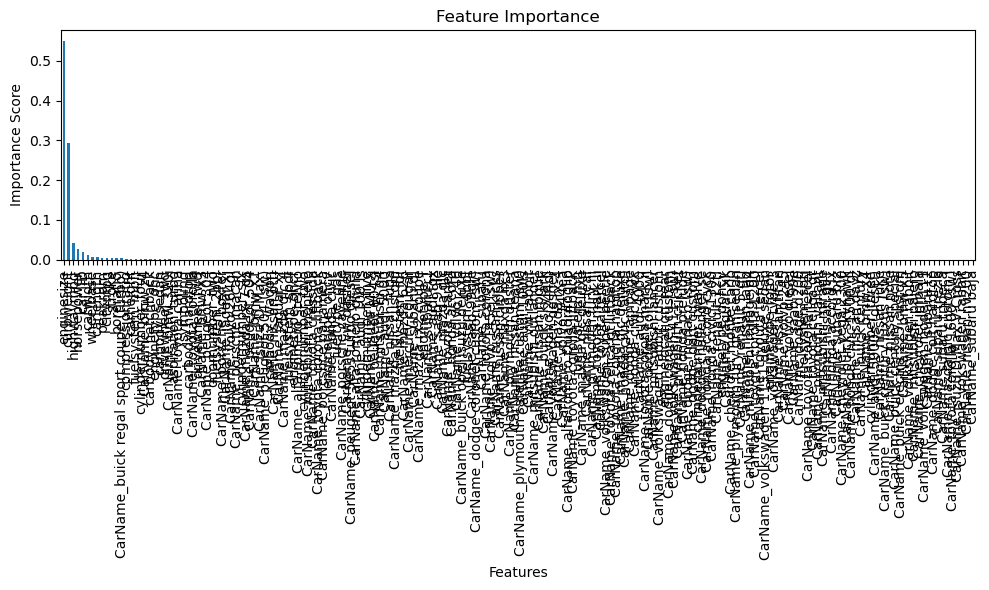

In [22]:
# 4 - Feature Importance Analysis

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)  # Assuming x_train and y_train are already defined

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=x_train.columns)

# Sort features by importance
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

----------------------------------------

In [25]:
# - 6  Hyperparameter Tuning

if best_model_name == "Random Forest Regressor":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
    grid_search.fit(x_train, y_train)
    
    # Display best parameters and performance
    print("Best Parameters:", grid_search.best_params_)
    best_rf = grid_search.best_estimator_
    
    # Re-evaluate on test set
    y_pred_tuned = best_rf.predict(x_test)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    
    print(f"Tuned R-Squared: {r2_tuned}, MSE: {mse_tuned}, MAE: {mae_tuned}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Tuned R-Squared: 0.9425388559402004, MSE: 4536213.756425839, MAE: 1483.3166401440812


-------------------------------------------------------------- END------------------------------------------------------------